In [67]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
nltk.download('stopwords')
import string
import re
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#import spacy
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Analysis of the dataset
### We examine the structure of the dataset looking for relevant columns for the analysis

In [68]:
tweets=pd.read_csv('C:/Users/LENOVO/Desktop/Proyecto-Mineria/Toxic tweets dataset - annotator2.csv')
tweets

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,toxic,severe_toxic,obscene,threat,identity_hate,insult,target,extended,comment
0,9.411401e+17,AmiIcarCajadas,NaN,NaN,9.411397e+17,"@PabloJarrinT Delfín el Leicester criollo, cam...",2017-12-14 2:57:38,9.411397e+17,2,https://www.twitter.com/AmiIcarCajadas/status/...,0,0,0,0,0,0,@PabloJarrinT,La página no existe,NaN
1,8.512670e+17,verosanza,NaN,NaN,8.512659e+17,@Martinminguchi Desde dónde lo estará escribie...,2017-04-10 2:53:56,8.512659e+17,2,https://www.twitter.com/verosanza/status/85126...,0,0,0,0,0,0,@GuillaumeLong,Desde dónde lo estará escribiendo...Francia???...,ninguno
2,9.367120e+17,estebancarranco,NaN,NaN,9.366059e+17,@aituitu Respeto su criterio amigo pero si fue...,2017-12-01 21:41:53,9.365740e+17,3,https://www.twitter.com/estebancarranco/status...,0,0,0,0,0,0,@aituitu,"Respeto su criterio amigo pero si fuese así, n...",discrepa pero es respetuoso
3,9.619900e+17,LuisAndrade2,NaN,NaN,9.617694e+17,"@higuerahernan Creo porque ""es multi facético,...",2018-02-09 15:47:40,9.617694e+17,2,https://www.twitter.com/LuisAndrade2/status/96...,0,0,0,0,0,0,external,"Creo porque ""es multi facético, inteligente y ...",alabanza
4,9.748170e+17,VinicioChimbor1,NaN,NaN,9.744270e+17,@luisevivanco Hágase revisar la presión del oj...,2018-03-17 1:17:48,9.744270e+17,2,https://www.twitter.com/VinicioChimbor1/status...,0,0,0,0,0,0,@luisevivanco,"Hágase revisar la presión del ojo, el parpadeo...",consejo
5,9.529467e+17,DavidAndres27,NaN,NaN,9.523808e+17,@jcarlosaizprua #ImbaburaDiceNO y todo el Ecua...,2018-01-15 16:52:55,9.523808e+17,2,https://www.twitter.com/DavidAndres27/status/9...,0,0,0,0,0,0,external,#ImbaburaDiceNO y todo el Ecuador no se deja e...,polìtico
6,9.121508e+17,CarlosVerareal,NaN,NaN,NaN,Pendejo. Perdido. Sin argumentos. https://t.co...,2017-09-25 3:04:28,9.121508e+17,1,https://www.twitter.com/CarlosVerareal/status/...,0,0,0,0,0,1,external,Pendejo. Perdido. Sin argumentos.,insulto
7,9.589062e+17,savirosero,NaN,NaN,9.588601e+17,@marcelaholguin @UNIMAXTV @SomosEcuador3 @Dile...,2018-02-01 3:33:56,9.588601e+17,2,https://www.twitter.com/savirosero/status/9589...,0,0,0,0,0,1,external,Mijita con esos apagones del CNE solo idiotas ...,insulto
8,9.387632e+17,Martinminguchi,NaN,NaN,NaN,Orden de Prisión en contra de Cristina Elisabe...,2017-12-07 13:32:31,9.387632e+17,1,https://www.twitter.com/Martinminguchi/status/...,0,0,0,0,0,0,na,Orden de Prisión en contra de Cristina Elisabe...,NaN
9,9.228456e+17,7david1992,NaN,NaN,9.228237e+17,@AlejaDuqueR @mashifraga Cuál es tu usuario en...,2017-10-24 15:21:57,9.228237e+17,2,https://www.twitter.com/7david1992/status/9228...,0,0,0,0,0,0,@AlejaDuqueR,Cuál es tu usuario en Snap Ale?,NaN


# Harmful Speech
## We are trying to visualize different types of harmful speech in the dataset using the 6 columns present in the dataset

Text(0.5,1,'Number of Harmful Speech by category')

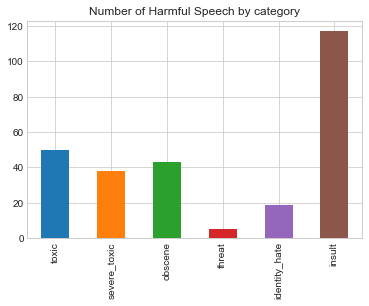

In [69]:
tweets[['toxic','severe_toxic','obscene','threat','identity_hate','insult']].sum().plot.bar()
plt.title('Number of Harmful Speech by category')

## We found that the use of sentiment analysis in the tweet is not useful because the text is too short giving us values from 0 to 0.500 or -0.500

## Changing the index column we order the tweets by date looking for some aditional information that can contribute to our investigation

In [70]:
tweets.index=pd.to_datetime(tweets['timestamp'],infer_datetime_format=True)
tweets

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,toxic,severe_toxic,obscene,threat,identity_hate,insult,target,extended,comment
timestamp,,,,,,,,,,,,,,,,,,,
2017-12-14 02:57:38,9.411401e+17,AmiIcarCajadas,NaN,NaN,9.411397e+17,"@PabloJarrinT Delfín el Leicester criollo, cam...",2017-12-14 2:57:38,9.411397e+17,2,https://www.twitter.com/AmiIcarCajadas/status/...,0,0,0,0,0,0,@PabloJarrinT,La página no existe,NaN
2017-04-10 02:53:56,8.512670e+17,verosanza,NaN,NaN,8.512659e+17,@Martinminguchi Desde dónde lo estará escribie...,2017-04-10 2:53:56,8.512659e+17,2,https://www.twitter.com/verosanza/status/85126...,0,0,0,0,0,0,@GuillaumeLong,Desde dónde lo estará escribiendo...Francia???...,ninguno
2017-12-01 21:41:53,9.367120e+17,estebancarranco,NaN,NaN,9.366059e+17,@aituitu Respeto su criterio amigo pero si fue...,2017-12-01 21:41:53,9.365740e+17,3,https://www.twitter.com/estebancarranco/status...,0,0,0,0,0,0,@aituitu,"Respeto su criterio amigo pero si fuese así, n...",discrepa pero es respetuoso
2018-02-09 15:47:40,9.619900e+17,LuisAndrade2,NaN,NaN,9.617694e+17,"@higuerahernan Creo porque ""es multi facético,...",2018-02-09 15:47:40,9.617694e+17,2,https://www.twitter.com/LuisAndrade2/status/96...,0,0,0,0,0,0,external,"Creo porque ""es multi facético, inteligente y ...",alabanza
2018-03-17 01:17:48,9.748170e+17,VinicioChimbor1,NaN,NaN,9.744270e+17,@luisevivanco Hágase revisar la presión del oj...,2018-03-17 1:17:48,9.744270e+17,2,https://www.twitter.com/VinicioChimbor1/status...,0,0,0,0,0,0,@luisevivanco,"Hágase revisar la presión del ojo, el parpadeo...",consejo
2018-01-15 16:52:55,9.529467e+17,DavidAndres27,NaN,NaN,9.523808e+17,@jcarlosaizprua #ImbaburaDiceNO y todo el Ecua...,2018-01-15 16:52:55,9.523808e+17,2,https://www.twitter.com/DavidAndres27/status/9...,0,0,0,0,0,0,external,#ImbaburaDiceNO y todo el Ecuador no se deja e...,polìtico
2017-09-25 03:04:28,9.121508e+17,CarlosVerareal,NaN,NaN,NaN,Pendejo. Perdido. Sin argumentos. https://t.co...,2017-09-25 3:04:28,9.121508e+17,1,https://www.twitter.com/CarlosVerareal/status/...,0,0,0,0,0,1,external,Pendejo. Perdido. Sin argumentos.,insulto
2018-02-01 03:33:56,9.589062e+17,savirosero,NaN,NaN,9.588601e+17,@marcelaholguin @UNIMAXTV @SomosEcuador3 @Dile...,2018-02-01 3:33:56,9.588601e+17,2,https://www.twitter.com/savirosero/status/9589...,0,0,0,0,0,1,external,Mijita con esos apagones del CNE solo idiotas ...,insulto
2017-12-07 13:32:31,9.387632e+17,Martinminguchi,NaN,NaN,NaN,Orden de Prisión en contra de Cristina Elisabe...,2017-12-07 13:32:31,9.387632e+17,1,https://www.twitter.com/Martinminguchi/status/...,0,0,0,0,0,0,na,Orden de Prisión en contra de Cristina Elisabe...,NaN


## We obained the number of tweets by weekday, this brings us information about the days where the people write more

Text(0.5,1,'Frequency of tweets by weekday')

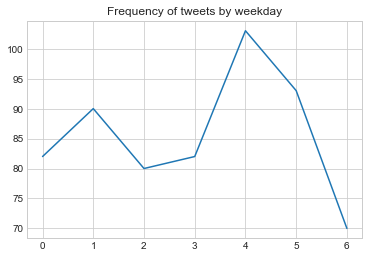

In [71]:
tweets=tweets.sort_index(ascending=True)
tweets.index.weekday.value_counts().sort_index().plot()
plt.title('Frequency of tweets by weekday')

# Use of LDA
## First we will join all the tweets in a corpus and search for topics pllying TFIDF model

In [72]:
corpus=[]
a=[]
for i in range(len(tweets['text'])):
        a=tweets['text'][i]
        corpus.append(a)
import gensim
import logging
import tempfile

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\LENOVO\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [73]:
from nltk.corpus import stopwords
from string import punctuation
import os

# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('spanish') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus] 

In [74]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(69, 5)
(5, 69)


,..,@aguschmer,@anderssonboscan,@anniecanizares,@arturo_m13,@carlosgalvez21,@carlosverareal,@fabriciovelav,@janethinostroza,@jcarlosaizprua,...,república,sabes,ser,si,siempre,solo,va,verga,vos,x
0,0.000000,0.013171,0.000000,0.00000,0.002913,0.000000,0.002378,0.002056,0.004880,0.000000,...,0.002358,0.000000,0.005347,0.003069,0.000000,0.000000,0.000000,0.00278,0.000000,0.000000
1,0.000000,0.006584,0.001934,0.00314,0.000000,0.000000,0.005969,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003506,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.002125
2,0.000000,0.000000,0.000000,0.00000,0.002363,0.004304,0.006076,0.000000,0.003868,0.000000,...,0.000000,0.000000,0.005128,0.014078,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.002081,0.003270,0.000000,0.00000,0.000000,0.000000,0.002176,0.000000,0.004120,0.002079,...,0.000000,0.000000,0.000000,0.004786,0.002732,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.002756,0.000000,0.00000,0.000000,0.000000,0.006578,0.000000,0.003332,0.000000,...,0.000000,0.002024,0.000000,0.002032,0.000000,0.002616,0.002516,0.00000,0.001972,0.000000


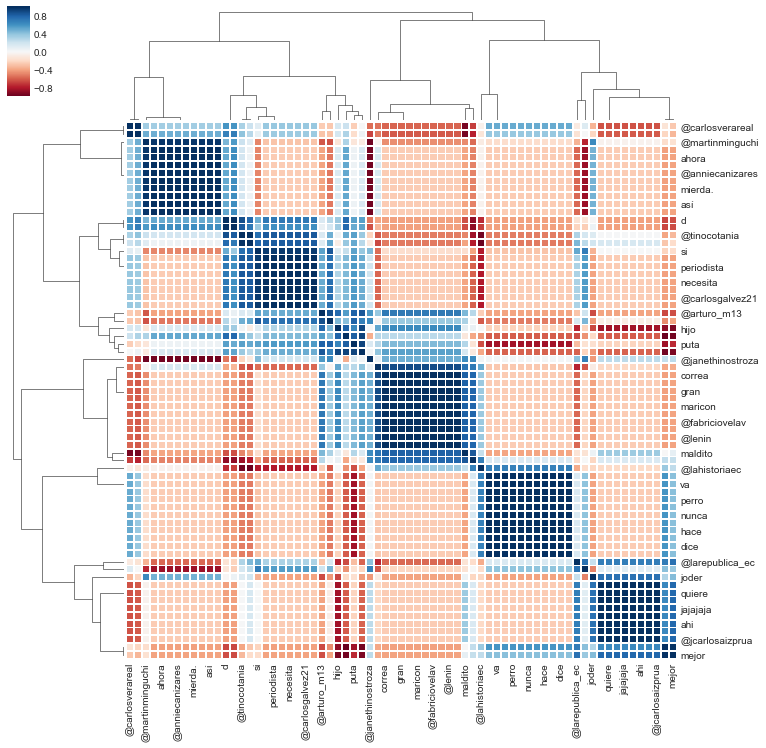

In [75]:
g=sb.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [76]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
3      59.991901        1       1   -8.726576 -101.440178
4      10.002252        1       2  126.690933 -111.627815
1      10.002175        1       3  120.093010   28.707027
2      10.001872        1       4   -4.542574   81.631927
0      10.001791        1       5 -110.099487  -11.078402, topic_info=     Category      Freq              Term     Total  loglift  logprob
term                                                                 
63    Default  2.000000                si  2.000000  30.0000  30.0000
19    Default  3.000000                 q  3.000000  29.0000  29.0000
25    Default  2.000000        @aguschmer  2.000000  28.0000  28.0000
189   Default  3.000000              puta  3.000000  27.0000  27.0000
61    Default  3.000000            mierda  3.000000  26.0000  26.0000
664   Default  2.000000     @lahistoriaec  2.000000  25.0000  25.0000
341   Default  3.000000   @martinminguchi  3.000000  24.0000  24.0000
701   Default  2.000000   @carlosverareal  2.000000  23.0000  23.0000
386   Default  1.000000      @tinocotania  1.000000  22.0000  22.0000
70    Default  1.000000               ser  1.000000  21.0000  21.0000
1301  Default  2.000000     @luisevivanco  2.000000  20.0000  20.0000
224   Default  1.000000              hijo  1.000000  19.0000  19.0000
718   Default  2.000000  @janethinostroza  2.000000  18.0000  18.0000
984   Default  0.000000             hijos  0.000000  17.0000  17.0000
56    Default  1.000000    @xaviercoellob  1.000000  16.0000  16.0000
211   Default  0.000000                 d  0.000000  15.0000  15.0000
237   Default  0.000000   @carlosgalvez21  0.000000  14.0000  14.0000
567   Default  1.000000           maldito  1.000000  13.0000  13.0000
1085  Default  0.000000                ja  0.000000  12.0000  12.0000
231   Default  1.000000            idiota  1.000000  11.0000  11.0000
1361  Default  0.000000              dice  0.000000  10.0000  10.0000
721   Default  0.000000              deja  0.000000   9.0000   9.0000
294   Default  0.000000            correa  0.000000   8.0000   8.0000
839   Default  0.000000              cara  0.000000   7.0000   7.0000
1279  Default  0.000000            @lenin  0.000000   6.0000   6.0000
783   Default  1.000000       @arturo_m13  1.000000   5.0000   5.0000
1146  Default  0.000000   @anniecanizares  0.000000   4.0000   4.0000
662   Default  0.000000              culo  0.000000   3.0000   3.0000
651   Default  0.000000         barcelona  0.000000   2.0000   2.0000
274   Default  0.000000        periodista  0.000000   1.0000   1.0000
...       ...       ...               ...       ...      ...      ...
1412   Topic5  0.064555              cuál  0.164957   1.3642  -6.8348
651    Topic5  0.152739         barcelona  0.400844   1.3376  -5.9735
25     Topic5  0.790410        @aguschmer  2.618555   1.1046  -4.3297
394    Topic5  0.152745             menos  0.438876   1.2470  -5.9735
579    Topic5  0.139130              gran  0.415264   1.2089  -6.0669
224    Topic5  0.293297              hijo  1.130426   0.9532  -5.3211
61     Topic5  0.687353            mierda  3.898465   0.5669  -4.4694
189    Topic5  0.545099              puta  3.188990   0.5359  -4.7013
70     Topic5  0.320874               ser  1.500204   0.7601  -5.2312
19     Topic5  0.603085                 q  3.931268   0.4277  -4.6002
984    Topic5  0.182205             hijos  0.692616   0.9671  -5.7971
664    Topic5  0.406257     @lahistoriaec  2.533603   0.4720  -4.9953
904    Topic5  0.152292             madre  0.554721   1.0097  -5.9765
590    Topic5  0.141509         república  0.496557   1.0471  -6.0499
1279   Topic5  0.202026            @lenin  0.984106   0.7191  -5.6939
1321   Topic5  0.129482           maricon  0.457974   1.0391  -6.1387
567    Topic5  0.204617           maldito  1.107895   0.6133  -5.6811
718    Topic5  0.292880  @janethinostroza  2.320574

# OTHER WAY OF LDA


In [77]:
def extract_mentions(tweet):
    '''Given a tweet, this function returns the user mentions'''
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        mentions.append(re.findall('@([^\s@]+)', tweet))
    else:
        mentions.append(["0"])
    return mentions[0]

# Put the user mentions in a new column in our dataframe
tweets['user_mentions'] = tweets['text'].map(extract_mentions)
tweets.head(10)

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,toxic,severe_toxic,obscene,threat,identity_hate,insult,target,extended,comment,user_mentions
timestamp,,,,,,,,,,,,,,,,,,,,
2012-01-28 16:10:53,1.632930e+17,LeninArtieda,NaN,NaN,NaN,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,2012-01-28 16:10:53,1.632930e+17,1,https://www.twitter.com/LeninArtieda/status/16...,0,0,0,0,0,0,na,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,NaN,[DiegowMM]
2012-01-28 16:19:50,1.632952e+17,javi_300,NaN,NaN,1.632858e+17,@LeninArtieda @JoseYcaza Me parece raro que ha...,2012-01-28 16:19:50,1.632842e+17,4,https://www.twitter.com/javi_300/status/163295...,0,0,0,0,0,0,@LeninArtieda,@LeninArtieda @JoseYcaza Me parece raro que ha...,NaN,"[LeninArtieda, JoseYcaza]"
2012-07-23 16:52:04,2.274460e+17,ElGuille1981,NaN,NaN,2.274399e+17,@andresitorres8 @aguschmer jajaja estamos en l...,2012-07-23 16:52:04,2.274387e+17,3,https://www.twitter.com/ElGuille1981/status/22...,0,0,0,0,0,1,external,@andresitorres8 @aguschmer jajaja estamos en l...,NaN,"[andresitorres8, aguschmer]"
2012-07-30 21:08:59,2.300474e+17,OmarVLuna,NaN,NaN,NaN,Bien Gongora!!!,2012-07-30 21:08:59,2.300474e+17,1,https://www.twitter.com/OmarVLuna/status/23004...,0,0,0,0,0,0,external,Bien Gongora!!!,NaN,[0]
2012-08-12 23:33:07,2.347947e+17,Ceagd,NaN,NaN,2.347929e+17,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,2012-08-12 23:33:07,2.347929e+17,2,https://www.twitter.com/Ceagd/status/234794677...,0,0,0,0,0,0,@RobertoBonafont,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,NaN,[RobertoBonafont:]
2012-09-23 19:51:49,2.499593e+17,williamludena,NaN,NaN,2.499587e+17,@Pichi_Mendoza Saludos hermano!,2012-09-23 19:51:49,2.499465e+17,7,https://www.twitter.com/williamludena/status/2...,0,0,0,0,0,0,@Pichi_Mendoza,@Pichi_Mendoza Saludos hermano!,NaN,[Pichi_Mendoza]
2012-10-10 11:39:41,2.559960e+17,rhernandeztv,NaN,NaN,NaN,"Glad to hear fom you, @Begumdonmez",2012-10-10 11:39:41,2.559960e+17,1,https://www.twitter.com/rhernandeztv/status/25...,0,0,0,0,0,0,external,"Glad to hear fom you, @Begumdonmez",saludo,[Begumdonmez]
2013-02-24 01:03:20,3.054830e+17,egasic,NaN,NaN,3.054825e+17,@xaviercoellob @tononoboa @LuchoNoboaYcaza de ...,2013-02-24 1:03:20,3.054825e+17,2,https://www.twitter.com/egasic/status/30548301...,1,0,0,0,0,0,external,@xaviercoellob @tononoboa @LuchoNoboaYcaza de ...,NaN,"[xaviercoellob, tononoboa, LuchoNoboaYcaza]"
2013-04-11 12:30:24,3.223258e+17,ivonnelago,NaN,NaN,NaN,Para ser estúpido y descriteriado no se necesi...,2013-04-11 12:30:24,3.223258e+17,1,https://www.twitter.com/ivonnelago/status/3223...,0,0,0,0,0,1,external,Para ser estúpido y descriteriado no se necesi...,NaN,[0]


In [78]:
def remove_mentions(tweet):
    '''Given a text, remove the user mentions'''
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        tweet = re.sub('@[^\s@]+', "" , tweet)
        mentions.append(tweet)
    else:
        mentions.append(tweet)
    return mentions[0]

tweets['text'] = tweets['text'].map(remove_mentions)
tweets.head(10)

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,toxic,severe_toxic,obscene,threat,identity_hate,insult,target,extended,comment,user_mentions
timestamp,,,,,,,,,,,,,,,,,,,,
2012-01-28 16:10:53,1.632930e+17,LeninArtieda,NaN,NaN,NaN,bajaron de Ciudad Alfaro a Montecristi. Algun...,2012-01-28 16:10:53,1.632930e+17,1,https://www.twitter.com/LeninArtieda/status/16...,0,0,0,0,0,0,na,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,NaN,[DiegowMM]
2012-01-28 16:19:50,1.632952e+17,javi_300,NaN,NaN,1.632858e+17,Me parece raro que hayan planificado un show...,2012-01-28 16:19:50,1.632842e+17,4,https://www.twitter.com/javi_300/status/163295...,0,0,0,0,0,0,@LeninArtieda,@LeninArtieda @JoseYcaza Me parece raro que ha...,NaN,"[LeninArtieda, JoseYcaza]"
2012-07-23 16:52:04,2.274460e+17,ElGuille1981,NaN,NaN,2.274399e+17,"jajaja estamos en la mierda, maldita llegada...",2012-07-23 16:52:04,2.274387e+17,3,https://www.twitter.com/ElGuille1981/status/22...,0,0,0,0,0,1,external,@andresitorres8 @aguschmer jajaja estamos en l...,NaN,"[andresitorres8, aguschmer]"
2012-07-30 21:08:59,2.300474e+17,OmarVLuna,NaN,NaN,NaN,Bien Gongora!!!,2012-07-30 21:08:59,2.300474e+17,1,https://www.twitter.com/OmarVLuna/status/23004...,0,0,0,0,0,0,external,Bien Gongora!!!,NaN,[0]
2012-08-12 23:33:07,2.347947e+17,Ceagd,NaN,NaN,2.347929e+17,RT Arroyo gana pelota a Giménez y Gol de Díaz...,2012-08-12 23:33:07,2.347929e+17,2,https://www.twitter.com/Ceagd/status/234794677...,0,0,0,0,0,0,@RobertoBonafont,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,NaN,[RobertoBonafont:]
2012-09-23 19:51:49,2.499593e+17,williamludena,NaN,NaN,2.499587e+17,Saludos hermano!,2012-09-23 19:51:49,2.499465e+17,7,https://www.twitter.com/williamludena/status/2...,0,0,0,0,0,0,@Pichi_Mendoza,@Pichi_Mendoza Saludos hermano!,NaN,[Pichi_Mendoza]
2012-10-10 11:39:41,2.559960e+17,rhernandeztv,NaN,NaN,NaN,"Glad to hear fom you,",2012-10-10 11:39:41,2.559960e+17,1,https://www.twitter.com/rhernandeztv/status/25...,0,0,0,0,0,0,external,"Glad to hear fom you, @Begumdonmez",saludo,[Begumdonmez]
2013-02-24 01:03:20,3.054830e+17,egasic,NaN,NaN,3.054825e+17,de q vale la libertadores si en el campeona...,2013-02-24 1:03:20,3.054825e+17,2,https://www.twitter.com/egasic/status/30548301...,1,0,0,0,0,0,external,@xaviercoellob @tononoboa @LuchoNoboaYcaza de ...,NaN,"[xaviercoellob, tononoboa, LuchoNoboaYcaza]"
2013-04-11 12:30:24,3.223258e+17,ivonnelago,NaN,NaN,NaN,Para ser estúpido y descriteriado no se necesi...,2013-04-11 12:30:24,3.223258e+17,1,https://www.twitter.com/ivonnelago/status/3223...,0,0,0,0,0,1,external,Para ser estúpido y descriteriado no se necesi...,NaN,[0]


In [80]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweets['Tweet_punct'] = tweets['text'].apply(lambda x: remove_punct(x))
sid = SentimentIntensityAnalyzer() 
tweets["sentiment"] = tweets["text"].apply(lambda x: sid.polarity_scores(x)["compound"])
tweets
tweets.head(10)

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,...,obscene,threat,identity_hate,insult,target,extended,comment,user_mentions,Tweet_punct,sentiment
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-28 16:10:53,1.632930e+17,LeninArtieda,NaN,NaN,NaN,bajaron de Ciudad Alfaro a Montecristi. Algun...,2012-01-28 16:10:53,1.632930e+17,1,https://www.twitter.com/LeninArtieda/status/16...,...,0,0,0,0,na,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,NaN,[DiegowMM],bajaron de Ciudad Alfaro a Montecristi Alguno...,0.0000
2012-01-28 16:19:50,1.632952e+17,javi_300,NaN,NaN,1.632858e+17,Me parece raro que hayan planificado un show...,2012-01-28 16:19:50,1.632842e+17,4,https://www.twitter.com/javi_300/status/163295...,...,0,0,0,0,@LeninArtieda,@LeninArtieda @JoseYcaza Me parece raro que ha...,NaN,"[LeninArtieda, JoseYcaza]",Me parece raro que hayan planificado un show...,0.0000
2012-07-23 16:52:04,2.274460e+17,ElGuille1981,NaN,NaN,2.274399e+17,"jajaja estamos en la mierda, maldita llegada...",2012-07-23 16:52:04,2.274387e+17,3,https://www.twitter.com/ElGuille1981/status/22...,...,0,0,0,1,external,@andresitorres8 @aguschmer jajaja estamos en l...,NaN,"[andresitorres8, aguschmer]",jajaja estamos en la mierda maldita llegada ...,0.0000
2012-07-30 21:08:59,2.300474e+17,OmarVLuna,NaN,NaN,NaN,Bien Gongora!!!,2012-07-30 21:08:59,2.300474e+17,1,https://www.twitter.com/OmarVLuna/status/23004...,...,0,0,0,0,external,Bien Gongora!!!,NaN,[0],Bien Gongora,0.0000
2012-08-12 23:33:07,2.347947e+17,Ceagd,NaN,NaN,2.347929e+17,RT Arroyo gana pelota a Giménez y Gol de Díaz...,2012-08-12 23:33:07,2.347929e+17,2,https://www.twitter.com/Ceagd/status/234794677...,...,0,0,0,0,@RobertoBonafont,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,NaN,[RobertoBonafont:],RT Arroyo gana pelota a Giménez y Gol de Díaz...,0.0000
2012-09-23 19:51:49,2.499593e+17,williamludena,NaN,NaN,2.499587e+17,Saludos hermano!,2012-09-23 19:51:49,2.499465e+17,7,https://www.twitter.com/williamludena/status/2...,...,0,0,0,0,@Pichi_Mendoza,@Pichi_Mendoza Saludos hermano!,NaN,[Pichi_Mendoza],Saludos hermano,0.0000
2012-10-10 11:39:41,2.559960e+17,rhernandeztv,NaN,NaN,NaN,"Glad to hear fom you,",2012-10-10 11:39:41,2.559960e+17,1,https://www.twitter.com/rhernandeztv/status/25...,...,0,0,0,0,external,"Glad to hear fom you, @Begumdonmez",saludo,[Begumdonmez],Glad to hear fom you,0.4588
2013-02-24 01:03:20,3.054830e+17,egasic,NaN,NaN,3.054825e+17,de q vale la libertadores si en el campeona...,2013-02-24 1:03:20,3.054825e+17,2,https://www.twitter.com/egasic/status/30548301...,...,0,0,0,0,external,@xaviercoellob @tononoboa @LuchoNoboaYcaza de ...,NaN,"[xaviercoellob, tononoboa, LuchoNoboaYcaza]",de q vale la libertadores si en el campeona...,0.0000
2013-04-11 12:30:24,3.223258e+17,ivonnelago,NaN,NaN,NaN,Para ser estúpido y descriteriado no se necesi...,2013-04-11 12:30:24,3.223258e+17,1,https://www.twitter.com/ivonnelago/status/3223...,...,0,0,0,1,external,Para ser estúpido y descriteriado no se necesi...,NaN,[0],Para ser estúpido y descriteriado no se necesi...,-0.2960


In [81]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweets['Tweet_tokenized'] = tweets['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
tweets.head()

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,...,threat,identity_hate,insult,target,extended,comment,user_mentions,Tweet_punct,sentiment,Tweet_tokenized
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-28 16:10:53,1.632930e+17,LeninArtieda,NaN,NaN,NaN,bajaron de Ciudad Alfaro a Montecristi. Algun...,2012-01-28 16:10:53,1.632930e+17,1,https://www.twitter.com/LeninArtieda/status/16...,...,0,0,0,na,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,NaN,[DiegowMM],bajaron de Ciudad Alfaro a Montecristi Alguno...,0.0,"[, bajaron, de, ciudad, alfaro, a, montecristi..."
2012-01-28 16:19:50,1.632952e+17,javi_300,NaN,NaN,1.632858e+17,Me parece raro que hayan planificado un show...,2012-01-28 16:19:50,1.632842e+17,4,https://www.twitter.com/javi_300/status/163295...,...,0,0,0,@LeninArtieda,@LeninArtieda @JoseYcaza Me parece raro que ha...,NaN,"[LeninArtieda, JoseYcaza]",Me parece raro que hayan planificado un show...,0.0,"[, me, parece, raro, que, hayan, planificado, ..."
2012-07-23 16:52:04,2.274460e+17,ElGuille1981,NaN,NaN,2.274399e+17,"jajaja estamos en la mierda, maldita llegada...",2012-07-23 16:52:04,2.274387e+17,3,https://www.twitter.com/ElGuille1981/status/22...,...,0,0,1,external,@andresitorres8 @aguschmer jajaja estamos en l...,NaN,"[andresitorres8, aguschmer]",jajaja estamos en la mierda maldita llegada ...,0.0,"[, jajaja, estamos, en, la, mierda, maldita, l..."
2012-07-30 21:08:59,2.300474e+17,OmarVLuna,NaN,NaN,NaN,Bien Gongora!!!,2012-07-30 21:08:59,2.300474e+17,1,https://www.twitter.com/OmarVLuna/status/23004...,...,0,0,0,external,Bien Gongora!!!,NaN,[0],Bien Gongora,0.0,"[bien, gongora]"
2012-08-12 23:33:07,2.347947e+17,Ceagd,NaN,NaN,2.347929e+17,RT Arroyo gana pelota a Giménez y Gol de Díaz...,2012-08-12 23:33:07,2.347929e+17,2,https://www.twitter.com/Ceagd/status/234794677...,...,0,0,0,@RobertoBonafont,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,NaN,[RobertoBonafont:],RT Arroyo gana pelota a Giménez y Gol de Díaz...,0.0,"[rt, arroyo, gana, pelota, a, giménez, y, gol,..."


In [82]:
stopword = nltk.corpus.stopwords.words('spanish')
stopword.extend(['d','x','q','bla','rt','ab','xq','ma'])
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweets['Tweet_nonstop'] = tweets['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweets.head(10)

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,...,identity_hate,insult,target,extended,comment,user_mentions,Tweet_punct,sentiment,Tweet_tokenized,Tweet_nonstop
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-28 16:10:53,1.632930e+17,LeninArtieda,NaN,NaN,NaN,bajaron de Ciudad Alfaro a Montecristi. Algun...,2012-01-28 16:10:53,1.632930e+17,1,https://www.twitter.com/LeninArtieda/status/16...,...,0,0,na,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,NaN,[DiegowMM],bajaron de Ciudad Alfaro a Montecristi Alguno...,0.0000,"[, bajaron, de, ciudad, alfaro, a, montecristi...","[, bajaron, ciudad, alfaro, montecristi, queda..."
2012-01-28 16:19:50,1.632952e+17,javi_300,NaN,NaN,1.632858e+17,Me parece raro que hayan planificado un show...,2012-01-28 16:19:50,1.632842e+17,4,https://www.twitter.com/javi_300/status/163295...,...,0,0,@LeninArtieda,@LeninArtieda @JoseYcaza Me parece raro que ha...,NaN,"[LeninArtieda, JoseYcaza]",Me parece raro que hayan planificado un show...,0.0000,"[, me, parece, raro, que, hayan, planificado, ...","[, parece, raro, planificado, show, mismo, tie..."
2012-07-23 16:52:04,2.274460e+17,ElGuille1981,NaN,NaN,2.274399e+17,"jajaja estamos en la mierda, maldita llegada...",2012-07-23 16:52:04,2.274387e+17,3,https://www.twitter.com/ElGuille1981/status/22...,...,0,1,external,@andresitorres8 @aguschmer jajaja estamos en l...,NaN,"[andresitorres8, aguschmer]",jajaja estamos en la mierda maldita llegada ...,0.0000,"[, jajaja, estamos, en, la, mierda, maldita, l...","[, jajaja, mierda, maldita, llegada, ]"
2012-07-30 21:08:59,2.300474e+17,OmarVLuna,NaN,NaN,NaN,Bien Gongora!!!,2012-07-30 21:08:59,2.300474e+17,1,https://www.twitter.com/OmarVLuna/status/23004...,...,0,0,external,Bien Gongora!!!,NaN,[0],Bien Gongora,0.0000,"[bien, gongora]","[bien, gongora]"
2012-08-12 23:33:07,2.347947e+17,Ceagd,NaN,NaN,2.347929e+17,RT Arroyo gana pelota a Giménez y Gol de Díaz...,2012-08-12 23:33:07,2.347929e+17,2,https://www.twitter.com/Ceagd/status/234794677...,...,0,0,@RobertoBonafont,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,NaN,[RobertoBonafont:],RT Arroyo gana pelota a Giménez y Gol de Díaz...,0.0000,"[rt, arroyo, gana, pelota, a, giménez, y, gol,...","[arroyo, gana, pelota, giménez, gol, díaz, lej..."
2012-09-23 19:51:49,2.499593e+17,williamludena,NaN,NaN,2.499587e+17,Saludos hermano!,2012-09-23 19:51:49,2.499465e+17,7,https://www.twitter.com/williamludena/status/2...,...,0,0,@Pichi_Mendoza,@Pichi_Mendoza Saludos hermano!,NaN,[Pichi_Mendoza],Saludos hermano,0.0000,"[, saludos, hermano]","[, saludos, hermano]"
2012-10-10 11:39:41,2.559960e+17,rhernandeztv,NaN,NaN,NaN,"Glad to hear fom you,",2012-10-10 11:39:41,2.559960e+17,1,https://www.twitter.com/rhernandeztv/status/25...,...,0,0,external,"Glad to hear fom you, @Begumdonmez",saludo,[Begumdonmez],Glad to hear fom you,0.4588,"[glad, to, hear, fom, you, ]","[glad, to, hear, fom, you, ]"
2013-02-24 01:03:20,3.054830e+17,egasic,NaN,NaN,3.054825e+17,de q vale la libertadores si en el campeona...,2013-02-24 1:03:20,3.054825e+17,2,https://www.twitter.com/egasic/status/30548301...,...,0,0,external,@xaviercoellob @tononoboa @LuchoNoboaYcaza de ...,NaN,"[xaviercoellob, tononoboa, LuchoNoboaYcaza]",de q vale la libertadores si en el campeona...,0.0000,"[, de, q, vale, la, libertadores, si, en, el, ...","[, vale, libertadores, si, campeonato, stamos,..."
2013-04-11 12:30:24,3.223258e+17,ivonnelago,NaN,NaN,NaN,Para ser estúpido y descriteriado no se necesi...,2013-04-11 12:30:24,3.223258e+17,1,https://www.twitter.com/ivonnelago/status/3223...,...,0,1,external,Para ser estúpido y descriteriado no se necesi...,NaN,[0],Para ser estúpido y descriteriado no se necesi...,-0.2960,"[para, ser, estúpido, y, descriteriado, no, se...","[ser, estúpido, descriteriado, necesita, estud..."


In [83]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweets['Tweet_stemmed'] = tweets['Tweet_nonstop'].apply(lambda x: stemming(x))
tweets.head()

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,...,insult,target,extended,comment,user_mentions,Tweet_punct,sentiment,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-28 16:10:53,1.632930e+17,LeninArtieda,NaN,NaN,NaN,bajaron de Ciudad Alfaro a Montecristi. Algun...,2012-01-28 16:10:53,1.632930e+17,1,https://www.twitter.com/LeninArtieda/status/16...,...,0,na,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,NaN,[DiegowMM],bajaron de Ciudad Alfaro a Montecristi Alguno...,0.0,"[, bajaron, de, ciudad, alfaro, a, montecristi...","[, bajaron, ciudad, alfaro, montecristi, queda...","[, bajaron, ciudad, alfaro, montecristi, queda..."
2012-01-28 16:19:50,1.632952e+17,javi_300,NaN,NaN,1.632858e+17,Me parece raro que hayan planificado un show...,2012-01-28 16:19:50,1.632842e+17,4,https://www.twitter.com/javi_300/status/163295...,...,0,@LeninArtieda,@LeninArtieda @JoseYcaza Me parece raro que ha...,NaN,"[LeninArtieda, JoseYcaza]",Me parece raro que hayan planificado un show...,0.0,"[, me, parece, raro, que, hayan, planificado, ...","[, parece, raro, planificado, show, mismo, tie...","[, parec, raro, planificado, show, mismo, tiem..."
2012-07-23 16:52:04,2.274460e+17,ElGuille1981,NaN,NaN,2.274399e+17,"jajaja estamos en la mierda, maldita llegada...",2012-07-23 16:52:04,2.274387e+17,3,https://www.twitter.com/ElGuille1981/status/22...,...,1,external,@andresitorres8 @aguschmer jajaja estamos en l...,NaN,"[andresitorres8, aguschmer]",jajaja estamos en la mierda maldita llegada ...,0.0,"[, jajaja, estamos, en, la, mierda, maldita, l...","[, jajaja, mierda, maldita, llegada, ]","[, jajaja, mierda, maldita, llegada, ]"
2012-07-30 21:08:59,2.300474e+17,OmarVLuna,NaN,NaN,NaN,Bien Gongora!!!,2012-07-30 21:08:59,2.300474e+17,1,https://www.twitter.com/OmarVLuna/status/23004...,...,0,external,Bien Gongora!!!,NaN,[0],Bien Gongora,0.0,"[bien, gongora]","[bien, gongora]","[bien, gongora]"
2012-08-12 23:33:07,2.347947e+17,Ceagd,NaN,NaN,2.347929e+17,RT Arroyo gana pelota a Giménez y Gol de Díaz...,2012-08-12 23:33:07,2.347929e+17,2,https://www.twitter.com/Ceagd/status/234794677...,...,0,@RobertoBonafont,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,NaN,[RobertoBonafont:],RT Arroyo gana pelota a Giménez y Gol de Díaz...,0.0,"[rt, arroyo, gana, pelota, a, giménez, y, gol,...","[arroyo, gana, pelota, giménez, gol, díaz, lej...","[arroyo, gana, pelota, giménez, gol, díaz, lej..."


In [84]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text if "ja" not in word]
    return text

    
tweets['Tweet_lemmatized'] = tweets['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
tweets.head()

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,...,target,extended,comment,user_mentions,Tweet_punct,sentiment,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-28 16:10:53,1.632930e+17,LeninArtieda,NaN,NaN,NaN,bajaron de Ciudad Alfaro a Montecristi. Algun...,2012-01-28 16:10:53,1.632930e+17,1,https://www.twitter.com/LeninArtieda/status/16...,...,na,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,NaN,[DiegowMM],bajaron de Ciudad Alfaro a Montecristi Alguno...,0.0,"[, bajaron, de, ciudad, alfaro, a, montecristi...","[, bajaron, ciudad, alfaro, montecristi, queda...","[, bajaron, ciudad, alfaro, montecristi, queda...","[, ciudad, alfaro, montecristi, quedaron, escu..."
2012-01-28 16:19:50,1.632952e+17,javi_300,NaN,NaN,1.632858e+17,Me parece raro que hayan planificado un show...,2012-01-28 16:19:50,1.632842e+17,4,https://www.twitter.com/javi_300/status/163295...,...,@LeninArtieda,@LeninArtieda @JoseYcaza Me parece raro que ha...,NaN,"[LeninArtieda, JoseYcaza]",Me parece raro que hayan planificado un show...,0.0,"[, me, parece, raro, que, hayan, planificado, ...","[, parece, raro, planificado, show, mismo, tie...","[, parec, raro, planificado, show, mismo, tiem...","[, parece, raro, planificado, show, mismo, tie..."
2012-07-23 16:52:04,2.274460e+17,ElGuille1981,NaN,NaN,2.274399e+17,"jajaja estamos en la mierda, maldita llegada...",2012-07-23 16:52:04,2.274387e+17,3,https://www.twitter.com/ElGuille1981/status/22...,...,external,@andresitorres8 @aguschmer jajaja estamos en l...,NaN,"[andresitorres8, aguschmer]",jajaja estamos en la mierda maldita llegada ...,0.0,"[, jajaja, estamos, en, la, mierda, maldita, l...","[, jajaja, mierda, maldita, llegada, ]","[, jajaja, mierda, maldita, llegada, ]","[, mierda, maldita, llegada, ]"
2012-07-30 21:08:59,2.300474e+17,OmarVLuna,NaN,NaN,NaN,Bien Gongora!!!,2012-07-30 21:08:59,2.300474e+17,1,https://www.twitter.com/OmarVLuna/status/23004...,...,external,Bien Gongora!!!,NaN,[0],Bien Gongora,0.0,"[bien, gongora]","[bien, gongora]","[bien, gongora]","[bien, gongora]"
2012-08-12 23:33:07,2.347947e+17,Ceagd,NaN,NaN,2.347929e+17,RT Arroyo gana pelota a Giménez y Gol de Díaz...,2012-08-12 23:33:07,2.347929e+17,2,https://www.twitter.com/Ceagd/status/234794677...,...,@RobertoBonafont,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,NaN,[RobertoBonafont:],RT Arroyo gana pelota a Giménez y Gol de Díaz...,0.0,"[rt, arroyo, gana, pelota, a, giménez, y, gol,...","[arroyo, gana, pelota, giménez, gol, díaz, lej...","[arroyo, gana, pelota, giménez, gol, díaz, lej...","[arroyo, gana, pelota, giménez, gol, díaz, der..."


In [86]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tweets['text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

600 Number of tweets has 2468 words


In [87]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abandona,abierto,abogado,abrazo,abril,abrumadora,absoluto,abuela,abusivo,...,ávila,época,éstabernard,éste,ética,éxito,ósea,última,último,único
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


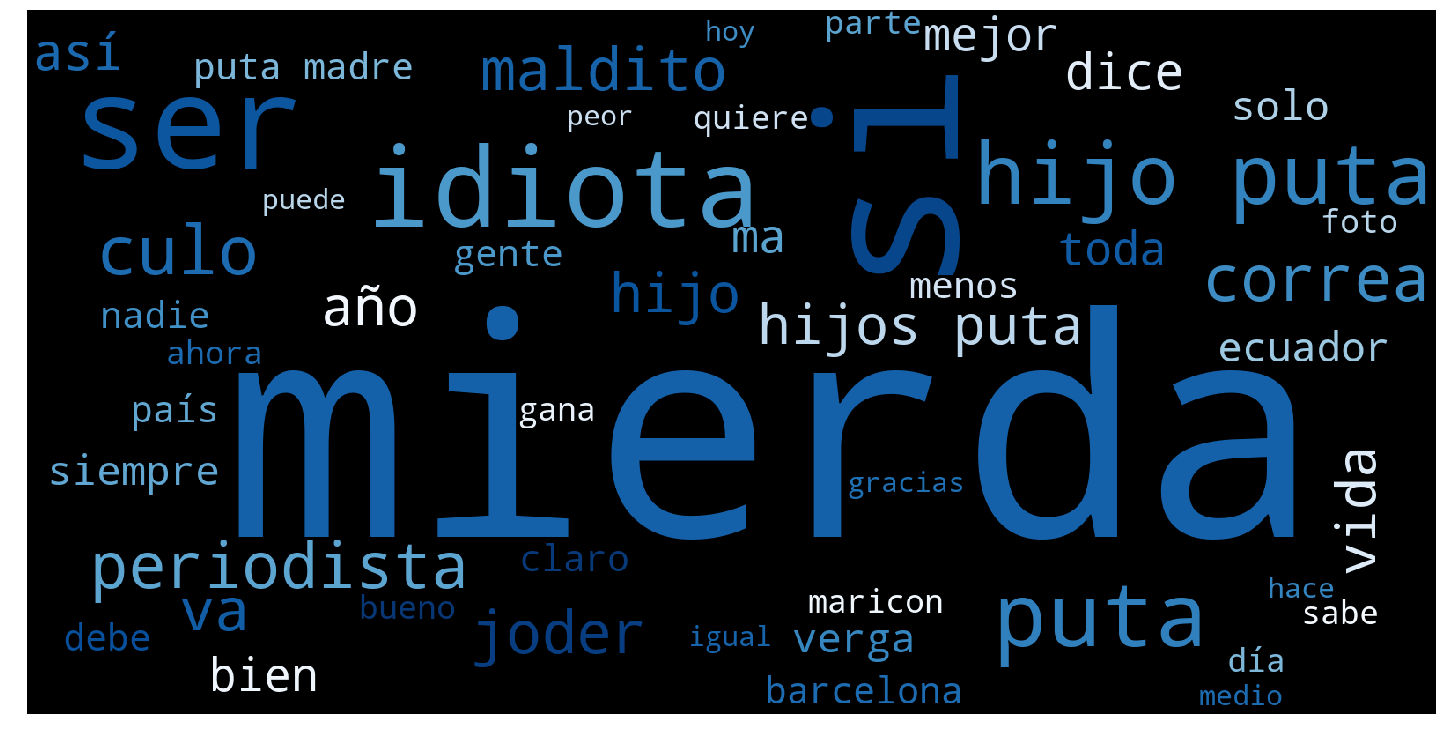

In [88]:
all_words = tweets['Tweet_lemmatized'].tolist()
cleaned_words = []
for i in all_words:
    for j in i:
            cleaned_words.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_words_series = pd.Series(cleaned_words)
words_counts = cleaned_words_series.value_counts()
hashes = cleaned_words_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [89]:
def mentions(lista):
    if lista[0]=='0':
        return 0
    else:
        return len(lista)
tweets['mentions']=tweets.user_mentions.apply(mentions)
tweets.head(10)

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,...,extended,comment,user_mentions,Tweet_punct,sentiment,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,mentions
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-28 16:10:53,1.632930e+17,LeninArtieda,NaN,NaN,NaN,bajaron de Ciudad Alfaro a Montecristi. Algun...,2012-01-28 16:10:53,1.632930e+17,1,https://www.twitter.com/LeninArtieda/status/16...,...,@DiegowMM bajaron de Ciudad Alfaro a Montecris...,NaN,[DiegowMM],bajaron de Ciudad Alfaro a Montecristi Alguno...,0.0000,"[, bajaron, de, ciudad, alfaro, a, montecristi...","[, bajaron, ciudad, alfaro, montecristi, queda...","[, bajaron, ciudad, alfaro, montecristi, queda...","[, ciudad, alfaro, montecristi, quedaron, escu...",1
2012-01-28 16:19:50,1.632952e+17,javi_300,NaN,NaN,1.632858e+17,Me parece raro que hayan planificado un show...,2012-01-28 16:19:50,1.632842e+17,4,https://www.twitter.com/javi_300/status/163295...,...,@LeninArtieda @JoseYcaza Me parece raro que ha...,NaN,"[LeninArtieda, JoseYcaza]",Me parece raro que hayan planificado un show...,0.0000,"[, me, parece, raro, que, hayan, planificado, ...","[, parece, raro, planificado, show, mismo, tie...","[, parec, raro, planificado, show, mismo, tiem...","[, parece, raro, planificado, show, mismo, tie...",2
2012-07-23 16:52:04,2.274460e+17,ElGuille1981,NaN,NaN,2.274399e+17,"jajaja estamos en la mierda, maldita llegada...",2012-07-23 16:52:04,2.274387e+17,3,https://www.twitter.com/ElGuille1981/status/22...,...,@andresitorres8 @aguschmer jajaja estamos en l...,NaN,"[andresitorres8, aguschmer]",jajaja estamos en la mierda maldita llegada ...,0.0000,"[, jajaja, estamos, en, la, mierda, maldita, l...","[, jajaja, mierda, maldita, llegada, ]","[, jajaja, mierda, maldita, llegada, ]","[, mierda, maldita, llegada, ]",2
2012-07-30 21:08:59,2.300474e+17,OmarVLuna,NaN,NaN,NaN,Bien Gongora!!!,2012-07-30 21:08:59,2.300474e+17,1,https://www.twitter.com/OmarVLuna/status/23004...,...,Bien Gongora!!!,NaN,[0],Bien Gongora,0.0000,"[bien, gongora]","[bien, gongora]","[bien, gongora]","[bien, gongora]",0
2012-08-12 23:33:07,2.347947e+17,Ceagd,NaN,NaN,2.347929e+17,RT Arroyo gana pelota a Giménez y Gol de Díaz...,2012-08-12 23:33:07,2.347929e+17,2,https://www.twitter.com/Ceagd/status/234794677...,...,RT @RobertoBonafont: Arroyo gana pelota a Gimé...,NaN,[RobertoBonafont:],RT Arroyo gana pelota a Giménez y Gol de Díaz...,0.0000,"[rt, arroyo, gana, pelota, a, giménez, y, gol,...","[arroyo, gana, pelota, giménez, gol, díaz, lej...","[arroyo, gana, pelota, giménez, gol, díaz, lej...","[arroyo, gana, pelota, giménez, gol, díaz, der...",1
2012-09-23 19:51:49,2.499593e+17,williamludena,NaN,NaN,2.499587e+17,Saludos hermano!,2012-09-23 19:51:49,2.499465e+17,7,https://www.twitter.com/williamludena/status/2...,...,@Pichi_Mendoza Saludos hermano!,NaN,[Pichi_Mendoza],Saludos hermano,0.0000,"[, saludos, hermano]","[, saludos, hermano]","[, saludo, hermano]","[, saludos, hermano]",1
2012-10-10 11:39:41,2.559960e+17,rhernandeztv,NaN,NaN,NaN,"Glad to hear fom you,",2012-10-10 11:39:41,2.559960e+17,1,https://www.twitter.com/rhernandeztv/status/25...,...,"Glad to hear fom you, @Begumdonmez",saludo,[Begumdonmez],Glad to hear fom you,0.4588,"[glad, to, hear, fom, you, ]","[glad, to, hear, fom, you, ]","[glad, to, hear, fom, you, ]","[glad, to, hear, fom, you, ]",1
2013-02-24 01:03:20,3.054830e+17,egasic,NaN,NaN,3.054825e+17,de q vale la libertadores si en el campeona...,2013-02-24 1:03:20,3.054825e+17,2,https://www.twitter.com/egasic/status/30548301...,...,@xaviercoellob @tononoboa @LuchoNoboaYcaza de ...,NaN,"[xaviercoellob, tononoboa, LuchoNoboaYcaza]",de q vale la libertadores si en el campeona...,0.0000,"[, de, q, vale, la, libertadores, si, en, el, ...","[, vale, libertadores, si, campeonato, stamos,...","[, vale, libertador, si, campeonato, stamo, n,...","[, vale, libertadores, si, campeonato, stamos,...",3
2013-04-11 12:30:24,3.223258e+17,ivonnelago,

In [90]:
lista = hashes.copy()
lista = np.array(lista)
lista = lista[lista != ""]
lista = list(lista)
print(lista)

['ciudad', 'alfaro', 'montecristi', 'quedaron', 'escuchando', 'presidente', 'parece', 'raro', 'planificado', 'show', 'mismo', 'tiempo', 'sabatina', 'obvio', 'iban', 'ir', 'pa', 'alla', 'mierda', 'maldita', 'llegada', 'bien', 'gongora', 'arroyo', 'gana', 'pelota', 'giménez', 'gol', 'díaz', 'derechazo', 'memorable', 'memorable', 'saludos', 'hermano', 'glad', 'to', 'hear', 'fom', 'you', 'vale', 'libertadores', 'si', 'campeonato', 'stamos', 'n', 'mierda', 'castillejos', 'dsgracia', 'ser', 'estúpido', 'descriteriado', 'necesita', 'estudiar', 'ser', 'bueno', 'sinónimo', 'ser', 'idiota', 'ser', 'bueno', 'virtud', 'idiotas', 'entienden', 'ser', 'bueno', 'sinónimo', 'ser', 'idiota', 'ser', 'bueno', 'virtud', 'idiotas', 'entienden', 'da', 'esperes', 'cambio', 'recompensa', 'agradable', 'sorpresa', 'si', 'caigo', 'levantas', 'si', 'enredo', 'desatas', 'si', 'pierdo', 'rescatas', 'bendito', 'jesús', 'foto', 'tabla', 'ubicaciones', 'previo', 'última', 'fecha', 'eliminatoriassudamericanas', 'httptco

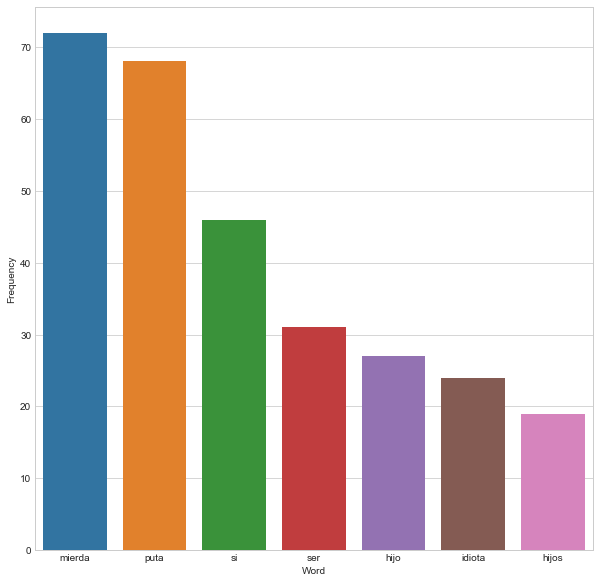

In [91]:
word_dist = nltk.FreqDist(lista)
rslt = pd.DataFrame(word_dist.most_common(50),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sb.set_style("whitegrid")
ax = sb.barplot(x="Word",y="Frequency", data=rslt.head(7))

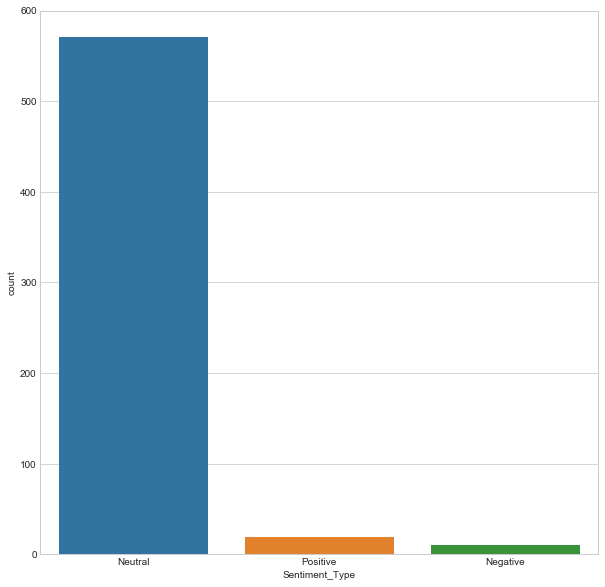

In [92]:
from textblob import TextBlob

bloblist_desc = list()

tweets_desc=tweets['Tweet_punct'].astype(str)
for row in tweets_desc:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    tweets_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(tweets_polarity_desc):
    if tweets_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif tweets_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

tweets_polarity_desc['Sentiment_Type'] = tweets_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sb.set_style("whitegrid")
ax = sb.countplot(x="Sentiment_Type", data=tweets_polarity_desc)


In [94]:
Processed_tweets=tweets[['timestamp','screen_name','text','mentions','sentiment','Tweet_lemmatized','toxic','severe_toxic','obscene','threat','identity_hate','insult']].copy()
Processed_tweets.head()

,timestamp,screen_name,text,mentions,sentiment,Tweet_lemmatized,toxic,severe_toxic,obscene,threat,identity_hate,insult
timestamp,,,,,,,,,,,,
2012-01-28 16:10:53,2012-01-28 16:10:53,LeninArtieda,bajaron de Ciudad Alfaro a Montecristi. Algun...,1,0.0,"[, ciudad, alfaro, montecristi, quedaron, escu...",0,0,0,0,0,0
2012-01-28 16:19:50,2012-01-28 16:19:50,javi_300,Me parece raro que hayan planificado un show...,2,0.0,"[, parece, raro, planificado, show, mismo, tie...",0,0,0,0,0,0
2012-07-23 16:52:04,2012-07-23 16:52:04,ElGuille1981,"jajaja estamos en la mierda, maldita llegada...",2,0.0,"[, mierda, maldita, llegada, ]",0,0,0,0,0,1
2012-07-30 21:08:59,2012-07-30 21:08:59,OmarVLuna,Bien Gongora!!!,0,0.0,"[bien, gongora]",0,0,0,0,0,0
2012-08-12 23:33:07,2012-08-12 23:33:07,Ceagd,RT Arroyo gana pelota a Giménez y Gol de Díaz...,1,0.0,"[arroyo, gana, pelota, giménez, gol, díaz, der...",0,0,0,0,0,0


In [95]:
print(hashes)

['', 'ciudad', 'alfaro', 'montecristi', 'quedaron', 'escuchando', 'presidente', '', 'parece', 'raro', 'planificado', 'show', 'mismo', 'tiempo', 'sabatina', 'obvio', 'iban', 'ir', 'pa', 'alla', '', 'mierda', 'maldita', 'llegada', '', 'bien', 'gongora', 'arroyo', 'gana', 'pelota', 'giménez', 'gol', 'díaz', 'derechazo', 'memorable', 'memorable', '', 'saludos', 'hermano', 'glad', 'to', 'hear', 'fom', 'you', '', '', 'vale', 'libertadores', 'si', 'campeonato', 'stamos', 'n', 'mierda', 'castillejos', 'dsgracia', 'ser', 'estúpido', 'descriteriado', 'necesita', 'estudiar', 'ser', 'bueno', 'sinónimo', 'ser', 'idiota', 'ser', 'bueno', 'virtud', 'idiotas', 'entienden', 'ser', 'bueno', 'sinónimo', 'ser', 'idiota', 'ser', 'bueno', 'virtud', 'idiotas', 'entienden', 'da', 'esperes', 'cambio', 'recompensa', 'agradable', 'sorpresa', 'si', 'caigo', 'levantas', 'si', 'enredo', 'desatas', 'si', 'pierdo', 'rescatas', 'bendito', 'jesús', 'foto', 'tabla', 'ubicaciones', 'previo', 'última', 'fecha', 'eliminato

In [102]:
Processed_tweets[Processed_tweets['Tweet_lemmatized'].astype(str).str.contains("mierda")]

,timestamp,screen_name,text,mentions,sentiment,Tweet_lemmatized,toxic,severe_toxic,obscene,threat,identity_hate,insult
timestamp,,,,,,,,,,,,
2012-07-23 16:52:04,2012-07-23 16:52:04,ElGuille1981,"jajaja estamos en la mierda, maldita llegada...",2,0.0000,"[, mierda, maldita, llegada, ]",0,0,0,0,0,1
2013-02-24 01:03:20,2013-02-24 1:03:20,egasic,de q vale la libertadores si en el campeona...,3,0.0000,"[, vale, libertadores, si, campeonato, stamos,...",1,0,0,0,0,0
2014-12-22 04:10:42,2014-12-22 4:10:42,Lucho_Patucho,"vago de mierda, periodista de a centavo, vend...",2,0.0000,"[, vago, mierda, periodista, centavo, vendido,...",0,0,0,0,0,1
2016-05-18 16:16:14,2016-05-18 16:16:14,HugoVer89988101,"zorra hp deja d joder, ers así no tiens ni Di...",1,-0.2960,"[, zorra, hp, joder, er, así, tiens, dios, ley...",0,0,1,0,0,0
2016-08-13 21:49:15,2016-08-13 21:49:15,elrobin0194,"Ávila otro alemán, solo fingiendo, en el piso...",1,0.0000,"[, ávila, alemán, solo, fingiendo, piso, pas, ...",0,1,0,0,0,0
2016-09-23 17:42:49,2016-09-23 17:42:49,Wpinto14,dedícate a ir al estadio hincha de Twitte...,5,0.0000,"[, dedícate, ir, estadio, hincha, twitter, feo...",0,1,0,0,0,0
2016-10-25 19:18:50,2016-10-25 19:18:50,turcacat,Cuando tengas ganas de mandar todo a la mierda...,0,0.0000,"[ganas, mandar, mierda, recuerda, vida, baile,...",1,0,0,0,0,0
2017-01-12 18:37:29,2017-01-12 18:37:29,faviogovea,lo que quieren es encontrar un Cojudo para t...,2,0.0000,"[, quieren, encontrar, cojudo, tirarle, muerto...",0,0,0,0,0,1
2017-02-05 00:12:14,2017-02-05 0:12:14,solounidolo,por gente como estamos en la mierda.. #Miser...,2,0.0000,"[, gente, mierda, miserablemalnacidohdp]",1,0,0,0,0,0


In [101]:
Processed_tweets[Processed_tweets.toxic==1]

,timestamp,screen_name,text,mentions,sentiment,Tweet_lemmatized,toxic,severe_toxic,obscene,threat,identity_hate,insult
timestamp,,,,,,,,,,,,
2013-02-24 01:03:20,2013-02-24 1:03:20,egasic,de q vale la libertadores si en el campeona...,3,0.0000,"[, vale, libertadores, si, campeonato, stamos,...",1,0,0,0,0,0
2015-05-21 16:24:01,2015-05-21 16:24:01,arquique,eso nunca perro pecho frío!!!,1,0.0000,"[, nunca, perro, pecho, frío]",1,0,0,0,0,0
2016-01-31 01:03:32,2016-01-31 1:03:32,eddymoran11,que manera de joder este viejo a barcelona a...,2,0.0000,"[, manera, joder, viejo, barcelona, apuesto, h...",1,0,0,0,0,0
2016-07-22 02:44:23,2016-07-22 2:44:23,VelezJohann,afloja ese culo,1,0.0000,"[, culo]",1,0,0,0,0,0
2016-07-27 19:27:56,2016-07-27 19:27:56,mhmnat1,que se vayan a Turquía entonces y no jodan po...,1,-0.2960,"[, vayan, turquía, entonces, jodan, acá]",1,0,0,0,0,0
2016-10-25 19:18:50,2016-10-25 19:18:50,turcacat,Cuando tengas ganas de mandar todo a la mierda...,0,0.0000,"[ganas, mandar, mierda, recuerda, vida, baile,...",1,0,0,0,0,0
2017-01-01 02:15:24,2017-01-01 2:15:24,Marito2200,el tweet estúpido del año.,1,0.0000,"[, tweet, estúpido, año]",1,0,0,0,0,0
2017-02-05 00:12:14,2017-02-05 0:12:14,solounidolo,por gente como estamos en la mierda.. #Miser...,2,0.0000,"[, gente, mierda, miserablemalnacidohdp]",1,0,0,0,0,0
2017-02-25 18:38:10,2017-02-25 18:38:10,marcopaezc,Eres una puerca.,1,0.0000,"[, puerca]",1,0,0,0,0,1


In [103]:
Processed_tweets.to_csv('toxic_tweets.csv')